In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers.convolutional import Conv1D
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.layers import TimeDistributed
from keras.models import Model
from keras import regularizers
from keras.layers  import  LSTM
from keras.optimizers import Adam
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector
from keras.models import Model
import tensorflow as tf
import math, sys, time
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
# Multiple Inputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
#from tensorflow.keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import load_model
import math, sys, time
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GRU, TimeDistributed, LSTM
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

from pandas._testing import assert_frame_equal
from pandas.testing import assert_index_equal
import warnings
warnings.filterwarnings('ignore')

In [4]:
from EEGP import EEGPreprocessor
from neuralstart_filter import EEGFilter
import pandas as pd
import numpy as np
import os
from sklearn.utils import resample
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pywt
import time
from encoder_neuralstart import LabelEncoderModel
from scaler_neuralstar import ScalerHandler
from Neuralstart_process2 import EEGDataPreprocessor1
from Neuralstart_process3 import EEGDataPreprocessor2
from neuralstart_dual_simultané_thread import DualDataPreprocessor
from neuralstart_ica_process import EEGDataPreprocessor_ica
from neuralstart_duel_process_ica import DualDataPreprocessor_ica
from neuralstar_pca_process import PCAHandler
from encoder_neuralstart import LabelEncoderModel
from scaler_neuralstar import ScalerHandler
from neural_start_sqrt import ecg_wavelet
from hajj_neuralstart import HajjProcessor
#from neuralstart_process_production2 import EEGPreprocessor2_prod

In [5]:
pwd

'/Users/chajjar/Documents/DataAnalyse'

In [7]:
def merge_dataframes_from_folder(folder_path):
    """
    Combine tous les fichiers .csv dans un dossier donné en une seule DataFrame pandas.
    """
    dataframes = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            filepath = os.path.join(folder_path, filename)
            df = pd.read_csv(filepath)
            dataframes.append(df)
    merged_df = pd.concat(dataframes)
    merged_df = merged_df.reset_index(drop=True)
    print("merge df is done.")
    return merged_df

In [8]:
df = merge_dataframes_from_folder('/Users/chajjar/Documents/DataAnalyse/quit/')

merge df is done.


In [9]:
df

,EEG 1_mean,EEG 1_std,EEG 1_min,EEG 1_max,EEG 1_p_value,EEG 1_relative_energy,EEG 1_fib_correlation,EEG 2_mean,EEG 2_std,EEG 2_min,...,think_Norm_relative_energy,think_Norm_fib_correlation,ICA_component_Norm_1_mean,ICA_component_Norm_1_std,ICA_component_Norm_1_min,ICA_component_Norm_1_max,ICA_component_Norm_1_p_value,ICA_component_Norm_1_relative_energy,ICA_component_Norm_1_fib_correlation,Direction
0,-1.244583e-07,4.210962e-08,-1.738677e-07,5.734697e-12,2.369317e-29,1.0,0.915314,2.430599e-07,8.880841e-08,1.379625e-11,...,1.0,0.0,-0.051486,0.068514,-0.102535,0.147770,6.176817e-07,1.0,0.111522,1.0
1,-4.074836e-08,7.474800e-08,-1.766100e-07,9.275905e-08,3.254271e-12,1.0,2.576301,4.469380e-08,7.057813e-08,-5.393058e-08,...,0.0,0.0,0.015610,0.053372,-0.095838,0.102493,9.129741e-05,1.0,1.829180,5.0
2,8.075852e-09,4.584377e-08,-7.240981e-08,9.959020e-08,4.176140e-03,1.0,0.945491,-9.864539e-09,5.208055e-08,-8.906533e-08,...,1.0,0.0,0.007507,0.028996,-0.048496,0.075752,2.993547e-05,1.0,1.649430,3.0
3,5.113287e-10,4.656329e-08,-9.519793e-08,1.114148e-07,8.097816e-01,1.0,1.251179,2.055875e-09,2.867655e-08,-5.475196e-08,...,0.0,0.0,-0.004205,0.039427,-0.058168,0.141095,1.972677e-02,1.0,1.086489,5.0
4,-8.289890e-09,5.192140e-08,-1.089886e-07,9.004688e-08,5.399303e-03,1.0,2.429511,6.960548e-09,3.904254e-08,-6.764635e-08,...,1.0,0.0,0.010097,0.026981,-0.036964,0.063873,2.175606e-10,1.0,1.871918,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,4.657174e-09,3.710830e-08,-6.768418e-08,8.764273e-08,3.502783e-03,1.0,2.330139,-1.053484e-09,5.901322e-08,-1.595210e-07,...,0.0,0.0,-0.015821,0.029823,-0.074183,0.049290,2.862916e-31,1.0,1.147567,5.0
5988,-2.260436e-10,4.812326e-08,-8.058471e-08,8.427196e-08,9.321549e-01,1.0,2.164677,6.608381e-10,3.424797e-08,-7.355684e-08,...,1.0,0.0,-0.006028,0.043473,-0.116407,0.074268,1.237999e-02,1.0,1.335242,2.0
5989,-5.804696e-10,5.048738e-08,-7.809191e-08,1.422105e-07,8.134035e-01,1.0,2.166454,2.083517e-09,4.883833e-08,-8.151696e-08,...,0.0,0.0,0.004702,0.028970,-0.080691,0.069079,9.297283e-04,1.0,0.921471,5.0
5990,-5.163974e-09,3.886783e-08,-5.976607e-08,8.985948e-08,5.438641e-02,1.0,0.692835,2.396278e-09,1.031851e-08,-1.155521e-08,...,1.0,0.0,-0.044638,0.038537,-0.109438,0.028433,4.878965e-41,1.0,2.501436,0.0


In [10]:
df.to_csv('/Users/chajjar/Documents/DataAnalyse/out/all.csv', index=False)

In [11]:
df = pd.read_csv("/Users/chajjar/Documents/DataAnalyse/out/all.csv")

In [12]:
df

,EEG 1_mean,EEG 1_std,EEG 1_min,EEG 1_max,EEG 1_p_value,EEG 1_relative_energy,EEG 1_fib_correlation,EEG 2_mean,EEG 2_std,EEG 2_min,...,think_Norm_relative_energy,think_Norm_fib_correlation,ICA_component_Norm_1_mean,ICA_component_Norm_1_std,ICA_component_Norm_1_min,ICA_component_Norm_1_max,ICA_component_Norm_1_p_value,ICA_component_Norm_1_relative_energy,ICA_component_Norm_1_fib_correlation,Direction
0,-1.244583e-07,4.210962e-08,-1.738677e-07,5.734697e-12,2.369317e-29,1.0,0.915314,2.430599e-07,8.880841e-08,1.379625e-11,...,1.0,0.0,-0.051486,0.068514,-0.102535,0.147770,6.176817e-07,1.0,0.111522,1.0
1,-4.074836e-08,7.474800e-08,-1.766100e-07,9.275905e-08,3.254271e-12,1.0,2.576301,4.469380e-08,7.057813e-08,-5.393058e-08,...,0.0,0.0,0.015610,0.053372,-0.095838,0.102493,9.129741e-05,1.0,1.829180,5.0
2,8.075852e-09,4.584377e-08,-7.240981e-08,9.959020e-08,4.176140e-03,1.0,0.945491,-9.864539e-09,5.208055e-08,-8.906533e-08,...,1.0,0.0,0.007507,0.028996,-0.048496,0.075752,2.993547e-05,1.0,1.649430,3.0
3,5.113287e-10,4.656329e-08,-9.519793e-08,1.114148e-07,8.097816e-01,1.0,1.251179,2.055875e-09,2.867655e-08,-5.475196e-08,...,0.0,0.0,-0.004205,0.039427,-0.058168,0.141095,1.972677e-02,1.0,1.086489,5.0
4,-8.289890e-09,5.192140e-08,-1.089886e-07,9.004688e-08,5.399303e-03,1.0,2.429511,6.960548e-09,3.904254e-08,-6.764635e-08,...,1.0,0.0,0.010097,0.026981,-0.036964,0.063873,2.175606e-10,1.0,1.871918,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,4.657174e-09,3.710830e-08,-6.768418e-08,8.764273e-08,3.502783e-03,1.0,2.330139,-1.053484e-09,5.901322e-08,-1.595210e-07,...,0.0,0.0,-0.015821,0.029823,-0.074183,0.049290,2.862916e-31,1.0,1.147567,5.0
5988,-2.260436e-10,4.812326e-08,-8.058471e-08,8.427196e-08,9.321549e-01,1.0,2.164677,6.608381e-10,3.424797e-08,-7.355684e-08,...,1.0,0.0,-0.006028,0.043473,-0.116407,0.074268,1.237999e-02,1.0,1.335242,2.0
5989,-5.804696e-10,5.048738e-08,-7.809191e-08,1.422105e-07,8.134035e-01,1.0,2.166454,2.083517e-09,4.883833e-08,-8.151696e-08,...,0.0,0.0,0.004702,0.028970,-0.080691,0.069079,9.297283e-04,1.0,0.921471,5.0
5990,-5.163974e-09,3.886783e-08,-5.976607e-08,8.985948e-08,5.438641e-02,1.0,0.692835,2.396278e-09,1.031851e-08,-1.155521e-08,...,1.0,0.0,-0.044638,0.038537,-0.109438,0.028433,4.878965e-41,1.0,2.501436,0.0


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Séparez les caractéristiques et les labels
X = df.drop("Direction", axis=1)
#X = result[["think_EEG 5_mean", "think_Gyroscope Y_mean", "think_Gyroscope Z_mean", "think_Accelerometer Z_mean", "think_Gyroscope X_mean"]]
y = df["Direction"]

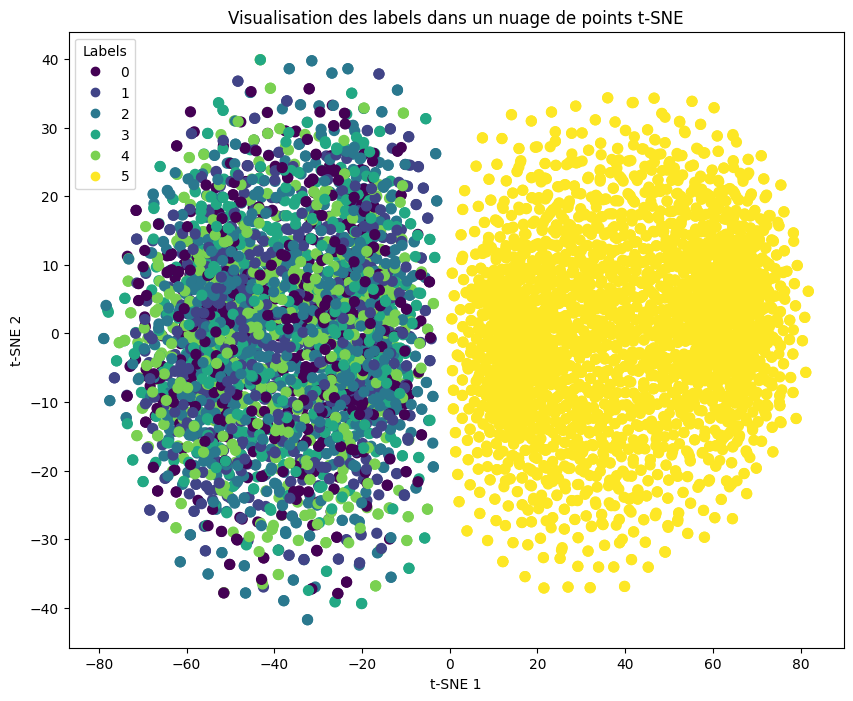

In [14]:
# Appliquez t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualisez le nuage de points avec des couleurs différentes pour chaque label
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Visualisation des labels dans un nuage de points t-SNE")
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier()

# Adapter le modèle sur les données
rf_model.fit(X, y)

# Obtenir l'importance des variables
importances = rf_model.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

for index in sorted_indices:
    print(f"{X.columns[index]}: {importances[index]}")

think_Gyroscope X_mean: 0.029934189066936776
think_Gyroscope Y_mean: 0.028686242648357407
think_EEG 2_mean: 0.0283682294723999
think_Norm_max: 0.028341412287084103
think_EEG 5_mean: 0.02732276717497968
think_EEG 4_mean: 0.02653172717067092
think_EEG 1_mean: 0.02610846541212071
think_EEG 3_mean: 0.02403077665678605
think_Accelerometer Y_mean: 0.02337979286230756
think_EEG 8_mean: 0.0195374334237875
think_Norm_mean: 0.01859573570636341
think_EEG 7_mean: 0.018001922058468126
think_Norm_min: 0.017344394309637908
think_Gyroscope Z_mean: 0.016106668379185576
think_Norm_relative_energy: 0.015981696927309115
think_Accelerometer Z_mean: 0.011807803998071418
think_EEG 6_mean: 0.010561298444955146
think_Gyroscope Z_relative_energy: 0.009992258044727188
think_Accelerometer Y_max: 0.008927898611126745
think_Accelerometer X_mean: 0.008012408382334331
ICA_component_Gyroscope Z_1_std: 0.006049692818251944
think_Gyroscope Y_relative_energy: 0.005856579825256838
ICA_component_Accelerometer X_1_std: 0.00

In [69]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
print(X)
counter = Counter(y)
print(counter)
import joblib

# Entraînez votre scaler
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

# Enregistrez le scaler
joblib.dump(scaler, 'scalerall.joblib') 

Counter({5.0: 2996, 2.0: 795, 4.0: 564, 1.0: 557, 0.0: 542, 3.0: 538})
         EEG 1_mean     EEG 1_std     EEG 1_min     EEG 1_max  EEG 1_p_value  \
0     -1.244583e-07  4.210962e-08 -1.738677e-07  5.734697e-12   2.369317e-29   
1     -4.074836e-08  7.474800e-08 -1.766100e-07  9.275905e-08   3.254271e-12   
2      8.075852e-09  4.584377e-08 -7.240981e-08  9.959020e-08   4.176140e-03   
3      5.113287e-10  4.656329e-08 -9.519793e-08  1.114148e-07   8.097816e-01   
4     -8.289890e-09  5.192140e-08 -1.089886e-07  9.004688e-08   5.399303e-03   
...             ...           ...           ...           ...            ...   
17756 -4.546708e-10  6.321324e-08 -1.245725e-07  1.292041e-07   7.523276e-02   
17757 -2.329601e-09  5.051242e-08 -8.411396e-08  1.135247e-07   2.930423e-01   
17758  2.269252e-09  4.328609e-08 -6.731912e-08  9.955132e-08   3.656911e-01   
17759  8.685759e-10  4.438757e-08 -7.286378e-08  9.806060e-08   3.168284e-01   
17760  1.517917e-09  4.001433e-08 -7.034130e-08  

['scalerall.joblib']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

In [72]:
print("x_train_seq shape:", X_train.shape)
print("y_train_seq shape:", y_train.shape)
print("x_test_seq shape:", X_test.shape)
print("y_test_seq shape:", y_test.shape)

x_train_seq shape: (14208, 315)
y_train_seq shape: (14208,)
x_test_seq shape: (3553, 315)
y_test_seq shape: (3553,)


In [32]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [33]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.966788629327329


In [34]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       607
         1.0       0.97      0.97      0.97       616
         2.0       0.98      0.91      0.94       572
         3.0       0.96      0.97      0.97       601
         4.0       0.95      0.97      0.96       560
         5.0       1.00      1.00      1.00       597

    accuracy                           0.97      3553
   macro avg       0.97      0.97      0.97      3553
weighted avg       0.97      0.97      0.97      3553



<AxesSubplot: >

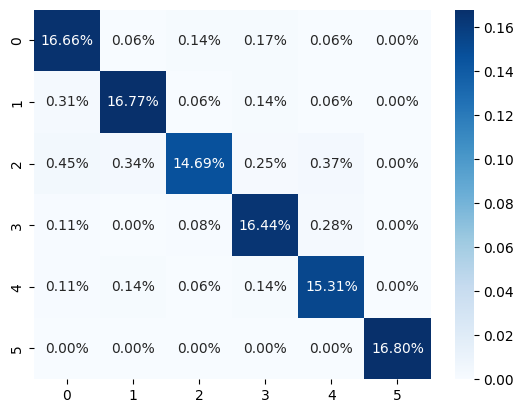

In [38]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [78]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [82]:
from ncps.wirings import AutoNCP
from ncps.tf import LTC
import tensorflow as tf
from ncps import wirings
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import EarlyStopping, ModelCheckpoint
import kerasncp as kncp
from kerasncp.tf import LTCCell
#from ncps import LTC, AutoNCP

num_classes = 6  # Remplacez par le nombre de classes dans vos données
timesteps = 1
input_shape = (timesteps, X_train_reshaped.shape[2])

#arch = kncp.wirings.Random(32, 1, sparsity_level=0.5)  # 32 units, 1 motor neuron
#rnn_cell = LTCCell(arch)

wiring = kncp.wirings.FullyConnected(80)
#fc_wiring = wirings.AutoNCP(80, 14)
rnn_cell = LTCCell(wiring)

model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=input_shape),
        keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
        #keras.layers.MaxPooling1D(pool_size=2),
        #keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        # Supprimer cette ligne : keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.RNN(rnn_cell, return_sequences=True),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    #run_eagerly=True
)

model.summary()

# Définissez les callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=100, verbose=1, mode='max')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


# Entraînez le modèle
model.fit(X_train, y_train, epochs=300, batch_size=30, validation_data=(X_test, y_test), shuffle=True, callbacks=[early_stopping, model_checkpoint]) 

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 1, 32)             30272     
                                                                 
 rnn_22 (RNN)                (None, 1, 80)             36304     
                                                                 
 global_average_pooling1d_22  (None, 80)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_22 (Dense)            (None, 6)                 486       
                                                                 
Total params: 67,062
Trainable params: 67,062
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
474/474 [==============================] - ETA: 0s - loss: 1.1949 - accuracy: 0.4967
Epoch 1: val_accur

474/474 [==============================] - 9s 19ms/step - loss: 0.1593 - accuracy: 0.9450 - val_loss: 0.4784 - val_accuracy: 0.8728
Epoch 25/300
474/474 [==============================] - ETA: 0s - loss: 0.1436 - accuracy: 0.9493
Epoch 25: val_accuracy improved from 0.87278 to 0.88235, saving model to best_model.h5
474/474 [==============================] - 8s 17ms/step - loss: 0.1436 - accuracy: 0.9493 - val_loss: 0.4549 - val_accuracy: 0.8824
Epoch 26/300
473/474 [============================>.] - ETA: 0s - loss: 0.1712 - accuracy: 0.9394
Epoch 26: val_accuracy improved from 0.88235 to 0.88348, saving model to best_model.h5
474/474 [==============================] - 8s 17ms/step - loss: 0.1711 - accuracy: 0.9394 - val_loss: 0.4288 - val_accuracy: 0.8835
Epoch 27/300
474/474 [==============================] - ETA: 0s - loss: 0.1268 - accuracy: 0.9562
Epoch 27: val_accuracy improved from 0.88348 to 0.88489, saving model to best_model.h5
474/474 [==============================] - 8s 17m

Epoch 53/300
473/474 [============================>.] - ETA: 0s - loss: 0.0727 - accuracy: 0.9743
Epoch 53: val_accuracy improved from 0.90234 to 0.90402, saving model to best_model.h5
474/474 [==============================] - 8s 17ms/step - loss: 0.0731 - accuracy: 0.9742 - val_loss: 0.4583 - val_accuracy: 0.9040
Epoch 54/300
471/474 [============================>.] - ETA: 0s - loss: 0.0728 - accuracy: 0.9752
Epoch 54: val_accuracy did not improve from 0.90402
474/474 [==============================] - 9s 18ms/step - loss: 0.0731 - accuracy: 0.9751 - val_loss: 0.4681 - val_accuracy: 0.8942
Epoch 55/300
472/474 [============================>.] - ETA: 0s - loss: 0.0751 - accuracy: 0.9727
Epoch 55: val_accuracy improved from 0.90402 to 0.90431, saving model to best_model.h5
474/474 [==============================] - 8s 17ms/step - loss: 0.0750 - accuracy: 0.9728 - val_loss: 0.4548 - val_accuracy: 0.9043
Epoch 56/300
474/474 [==============================] - ETA: 0s - loss: 0.0786 - acc

474/474 [==============================] - ETA: 0s - loss: 0.0494 - accuracy: 0.9832
Epoch 81: val_accuracy did not improve from 0.90994
474/474 [==============================] - 8s 17ms/step - loss: 0.0494 - accuracy: 0.9832 - val_loss: 0.5324 - val_accuracy: 0.9054
Epoch 82/300
474/474 [==============================] - ETA: 0s - loss: 0.0559 - accuracy: 0.9805
Epoch 82: val_accuracy did not improve from 0.90994
474/474 [==============================] - 8s 18ms/step - loss: 0.0559 - accuracy: 0.9805 - val_loss: 0.6040 - val_accuracy: 0.8905
Epoch 83/300
473/474 [============================>.] - ETA: 0s - loss: 0.0699 - accuracy: 0.9770
Epoch 83: val_accuracy did not improve from 0.90994
474/474 [==============================] - 8s 17ms/step - loss: 0.0699 - accuracy: 0.9770 - val_loss: 0.4773 - val_accuracy: 0.9071
Epoch 84/300
473/474 [============================>.] - ETA: 0s - loss: 0.0454 - accuracy: 0.9828
Epoch 84: val_accuracy improved from 0.90994 to 0.91162, saving model

Epoch 110/300
473/474 [============================>.] - ETA: 0s - loss: 0.0397 - accuracy: 0.9872
Epoch 110: val_accuracy improved from 0.91753 to 0.91866, saving model to best_model.h5
474/474 [==============================] - 8s 18ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.4787 - val_accuracy: 0.9187
Epoch 111/300
471/474 [============================>.] - ETA: 0s - loss: 0.0355 - accuracy: 0.9884
Epoch 111: val_accuracy did not improve from 0.91866
474/474 [==============================] - 8s 18ms/step - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.5600 - val_accuracy: 0.9108
Epoch 112/300
471/474 [============================>.] - ETA: 0s - loss: 0.0425 - accuracy: 0.9866
Epoch 112: val_accuracy did not improve from 0.91866
474/474 [==============================] - 8s 18ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.5505 - val_accuracy: 0.9071
Epoch 113/300
472/474 [============================>.] - ETA: 0s - loss: 0.0447 - accuracy: 0.9846
Epoch 113: val

474/474 [==============================] - 10s 21ms/step - loss: 0.0360 - accuracy: 0.9877 - val_loss: 0.5436 - val_accuracy: 0.9102
Epoch 139/300
472/474 [============================>.] - ETA: 0s - loss: 0.0258 - accuracy: 0.9913
Epoch 139: val_accuracy did not improve from 0.92091
474/474 [==============================] - 9s 18ms/step - loss: 0.0257 - accuracy: 0.9913 - val_loss: 0.5769 - val_accuracy: 0.9102
Epoch 140/300
474/474 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9861
Epoch 140: val_accuracy did not improve from 0.92091
474/474 [==============================] - 8s 18ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.5528 - val_accuracy: 0.9108
Epoch 141/300
474/474 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9861
Epoch 141: val_accuracy did not improve from 0.92091
474/474 [==============================] - 9s 19ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.5565 - val_accuracy: 0.9127
Epoch 142/300
4

472/474 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 0.9934
Epoch 167: val_accuracy did not improve from 0.92710
474/474 [==============================] - 8s 18ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.5477 - val_accuracy: 0.9220
Epoch 168/300
471/474 [============================>.] - ETA: 0s - loss: 0.0221 - accuracy: 0.9921
Epoch 168: val_accuracy did not improve from 0.92710
474/474 [==============================] - 8s 18ms/step - loss: 0.0220 - accuracy: 0.9922 - val_loss: 0.5763 - val_accuracy: 0.9232
Epoch 169/300
474/474 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 0.9901
Epoch 169: val_accuracy did not improve from 0.92710
474/474 [==============================] - 8s 18ms/step - loss: 0.0289 - accuracy: 0.9901 - val_loss: 0.6397 - val_accuracy: 0.9133
Epoch 170/300
472/474 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.9877
Epoch 170: val_accuracy did not improve from 0.92710
474/474 [=

Epoch 196/300
473/474 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9914
Epoch 196: val_accuracy did not improve from 0.92879
474/474 [==============================] - 9s 18ms/step - loss: 0.0260 - accuracy: 0.9914 - val_loss: 0.7644 - val_accuracy: 0.9001
Epoch 197/300
474/474 [==============================] - ETA: 0s - loss: 0.0404 - accuracy: 0.9881
Epoch 197: val_accuracy did not improve from 0.92879
474/474 [==============================] - 8s 18ms/step - loss: 0.0404 - accuracy: 0.9881 - val_loss: 0.5798 - val_accuracy: 0.9156
Epoch 198/300
474/474 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 0.9897
Epoch 198: val_accuracy did not improve from 0.92879
474/474 [==============================] - 8s 18ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.6243 - val_accuracy: 0.9068
Epoch 199/300
473/474 [============================>.] - ETA: 0s - loss: 0.0314 - accuracy: 0.9898
Epoch 199: val_accuracy did not improve from 0.92

Epoch 225/300
471/474 [============================>.] - ETA: 0s - loss: 0.0227 - accuracy: 0.9926
Epoch 225: val_accuracy did not improve from 0.92879
474/474 [==============================] - 8s 17ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.6114 - val_accuracy: 0.9099
Epoch 226/300
471/474 [============================>.] - ETA: 0s - loss: 0.0278 - accuracy: 0.9903
Epoch 226: val_accuracy did not improve from 0.92879
474/474 [==============================] - 8s 17ms/step - loss: 0.0278 - accuracy: 0.9903 - val_loss: 0.6888 - val_accuracy: 0.9085
Epoch 227/300
473/474 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9920
Epoch 227: val_accuracy did not improve from 0.92879
474/474 [==============================] - 8s 18ms/step - loss: 0.0234 - accuracy: 0.9920 - val_loss: 0.6295 - val_accuracy: 0.9209
Epoch 228/300
473/474 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9936
Epoch 228: val_accuracy did not improve from 0.92

Epoch 254/300
472/474 [============================>.] - ETA: 0s - loss: 0.0377 - accuracy: 0.9872
Epoch 254: val_accuracy did not improve from 0.92879
474/474 [==============================] - 8s 18ms/step - loss: 0.0376 - accuracy: 0.9873 - val_loss: 0.5992 - val_accuracy: 0.9201
Epoch 255/300
472/474 [============================>.] - ETA: 0s - loss: 0.0127 - accuracy: 0.9962
Epoch 255: val_accuracy did not improve from 0.92879
474/474 [==============================] - 9s 18ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.5781 - val_accuracy: 0.9249
Epoch 256/300
471/474 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9989
Epoch 256: val_accuracy did not improve from 0.92879
474/474 [==============================] - 8s 18ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.5946 - val_accuracy: 0.9260
Epoch 257/300
473/474 [============================>.] - ETA: 0s - loss: 6.0298e-04 - accuracy: 1.0000
Epoch 257: val_accuracy did not improve from 

Epoch 282/300
474/474 [==============================] - ETA: 0s - loss: 2.6954e-07 - accuracy: 1.0000
Epoch 282: val_accuracy did not improve from 0.92964
474/474 [==============================] - 8s 18ms/step - loss: 2.6954e-07 - accuracy: 1.0000 - val_loss: 0.9276 - val_accuracy: 0.9282
Epoch 283/300
472/474 [============================>.] - ETA: 0s - loss: 2.0865e-07 - accuracy: 1.0000
Epoch 283: val_accuracy did not improve from 0.92964
474/474 [==============================] - 9s 18ms/step - loss: 2.0899e-07 - accuracy: 1.0000 - val_loss: 0.9419 - val_accuracy: 0.9288
Epoch 284/300
473/474 [============================>.] - ETA: 0s - loss: 1.6119e-07 - accuracy: 1.0000
Epoch 284: val_accuracy did not improve from 0.92964
474/474 [==============================] - 8s 18ms/step - loss: 1.6103e-07 - accuracy: 1.0000 - val_loss: 0.9550 - val_accuracy: 0.9291
Epoch 285/300
471/474 [============================>.] - ETA: 0s - loss: 1.2426e-07 - accuracy: 1.0000
Epoch 285: val_accura

In [83]:
restored_model = tf.keras.models.load_model("best_model.h5")

In [85]:
restored_model.evaluate(x=X_test, y=y_test)

112/112 [==============================] - 1s 5ms/step - loss: 0.7294 - accuracy: 0.9296


[0.729371964931488, 0.9296369552612305]

In [87]:
# Évaluez le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

112/112 [==============================] - 1s 5ms/step - loss: 1.1488 - accuracy: 0.9291
Test accuracy: 0.9290740489959717


In [88]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

112/112 [==============================] - 1s 5ms/step


In [89]:
predicted_classes

array([3, 0, 0, ..., 1, 2, 4])